In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormal ization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras()
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [ ]:
base_dir = '/tmp'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

**Data** **Agumentation**

In [ ]:
img_size = 64
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(train_dir,
                                                    target_size = (img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory(test_dir,
                                                    target_size = (img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1343 images belonging to 4 classes.
Found 150 images belonging to 4 classes.


**Model**

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
model = Sequential()

#1 - conv

model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2 - conv
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flatten
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4,activation='softmax'))

opt = Adam(lr=0.0005)

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 batch_normalization_32 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                                 
 activation_32 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint('model_weights.h5',monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
callbacks = [checkpoint, reduce_lr]

history = model.fit(x=train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=validation_steps,
                   callbacks = callbacks )

Epoch 1/15
20/20 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9937
Epoch 1: saving model to model_weights.h5
20/20 [==============================] - 58s 3s/step - loss: 0.0301 - accuracy: 0.9937 - val_loss: 5.5483 - val_accuracy: 0.2344 - lr: 5.0000e-04
Epoch 2/15
20/20 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9992
Epoch 2: saving model to model_weights.h5
20/20 [==============================] - 58s 3s/step - loss: 0.0146 - accuracy: 0.9992 - val_loss: 0.9817 - val_accuracy: 0.6719 - lr: 5.0000e-04
Epoch 3/15
20/20 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9977
Epoch 3: saving model to model_weights.h5
20/20 [==============================] - 57s 3s/step - loss: 0.0111 - accuracy: 0.9977 - val_loss: 0.8678 - val_accuracy: 0.6406 - lr: 5.0000e-04
Epoch 4/15
20/20 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9977
Epoch 4: saving model to model_weights.h5
20/20 [===========

In [ ]:
print(history.history)

{'loss': [0.5107477903366089, 0.15965251624584198, 0.08672291785478592, 0.04566746577620506, 0.02653997391462326, 0.019628196954727173, 0.017110921442508698, 0.033769022673368454, 0.020282864570617676, 0.007404683157801628, 0.00986882671713829, 0.011971116997301579, 0.008259167894721031, 0.0061132414266467094, 0.0063382829539477825], 'categorical_accuracy': [0.8311180472373962, 0.9538702368736267, 0.974198579788208, 0.9921814203262329, 0.9953088164329529, 0.9953088164329529, 0.9960907101631165, 0.989835798740387, 0.9945269823074341, 0.9992181658744812, 0.9984362721443176, 0.9976544380187988, 0.9992181658744812, 0.9984362721443176, 1.0], 'val_loss': [72.28800964355469, 35.66029739379883, 19.111249923706055, 7.890944480895996, 2.1058666706085205, 1.3551836013793945, 1.3267849683761597, 0.7550016641616821, 0.13001208007335663, 0.09145821630954742, 0.7397626638412476, 0.3267013728618622, 0.21690493822097778, 0.1302861124277115, 0.1632138341665268], 'val_categorical_accuracy': [0.21875, 0.2

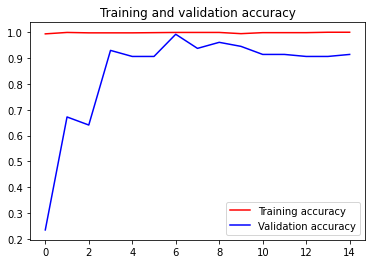

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
!pip install plot_conf_matr


ERROR: Could not find a version that satisfies the requirement plot_conf_matr (from versions: none)
ERROR: No matching distribution found for plot_conf_matr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


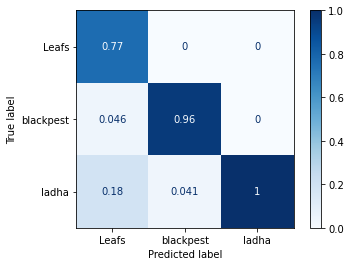

In [ ]:

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
labels = ["Leafs", "blackpest", "ladha"]

cm = confusion_matrix(validation_generator.classes, y_pred, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model.save('model_weights.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

def prepare(filepath):
    IMG_SIZE = 64
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

img_path = '/tmp/test/ladha/image0035.jpg'
img = image.load_img(img_path, target_size=(64, 64,1))
img_array = image.img_to_array(img)
prediction = model.predict([prepare(img_path)])
print(prediction)        

[[1.2761062e-06 9.9999821e-01 4.4268634e-07 5.4585310e-08]]


ladha


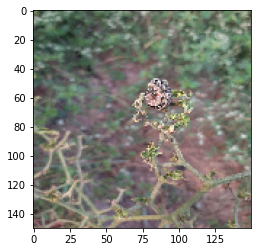

In [ ]:
img = image.load_img(img_path, target_size=(150, 150,1))
plt.imshow(img)
classes = {1:'ladha',2:'leaf',3:'black pest'}
classes_x=np.argmax(prediction,axis=1)
print(classes[int(classes_x)])

In [ ]:
print("Training set accuracy :", end = " ")

print(history.history['accuracy'][-1])

print("Test data  accuracy:", end = " ")

print(history.history['val_accuracy'][-1])

Training set accuracy : 1.0
Test data  accuracy: 0.9140625
